In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.sparse import csc_array
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

from qs_mps.applications.Z2.exact_hamiltonian import *
from qs_mps.sparse_hamiltonians_and_operators import *
from qs_mps.mps_class import MPS
from qs_mps.utils import anim, get_cx, get_cy
from qs_mps.applications.ISING.utils import *

In [3]:
model = "Z2_dual"
chi = 256
h_i, h_f = 0.6, 0.9
a = 1e-2
couplings = np.arange(h_i,h_f,a)
DMRG2 = False
N, L = 6, 30
Rs = [6,7,8]
path = "/Users/fradm/Desktop/projects/1_Z2"

In [4]:
model = "Z2_dual"
chi = 128
h_i, h_f = 0.8, 1.1
a = 1e-2
couplings = np.arange(h_i,h_f,a)
DMRG2 = False
N, L = 5, 50
Rs = [25,26,27,28,29,30]
path = "/Users/fradm/Desktop/projects/1_Z2"

## On-axis overlaps

In [5]:
fidelity = []
for R in Rs:
    fidelity_R = []
    for k in range(len(couplings)-1):
        print(f"R: {R}, coupling: {couplings[k]:.4f}")
        z2_lattice_g = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k], bc='pbc')
        z2_lattice_g.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,0])
        z2_lattice_g.charges = z2_lattice_g.Z2.charges
        z2_lattice_g.Z2._define_sector()
        z2_lattice_g_dg = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k+1], bc='pbc')
        z2_lattice_g_dg.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,0])
        z2_lattice_g_dg.charges = z2_lattice_g_dg.Z2.charges
        z2_lattice_g_dg.Z2._define_sector()
        
        z2_lattice_g.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,0])
        z2_lattice_g_dg.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,0])
        z2_lattice_g.ancilla_sites = z2_lattice_g_dg.sites.copy()

        fidelity_R.append(z2_lattice_g._compute_norm(site=1, mixed=True).copy())
    fidelity.append(fidelity_R)
fidelity = np.array(fidelity)

R: 25, coupling: 0.8000
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.8), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8100
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.82), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8200
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc

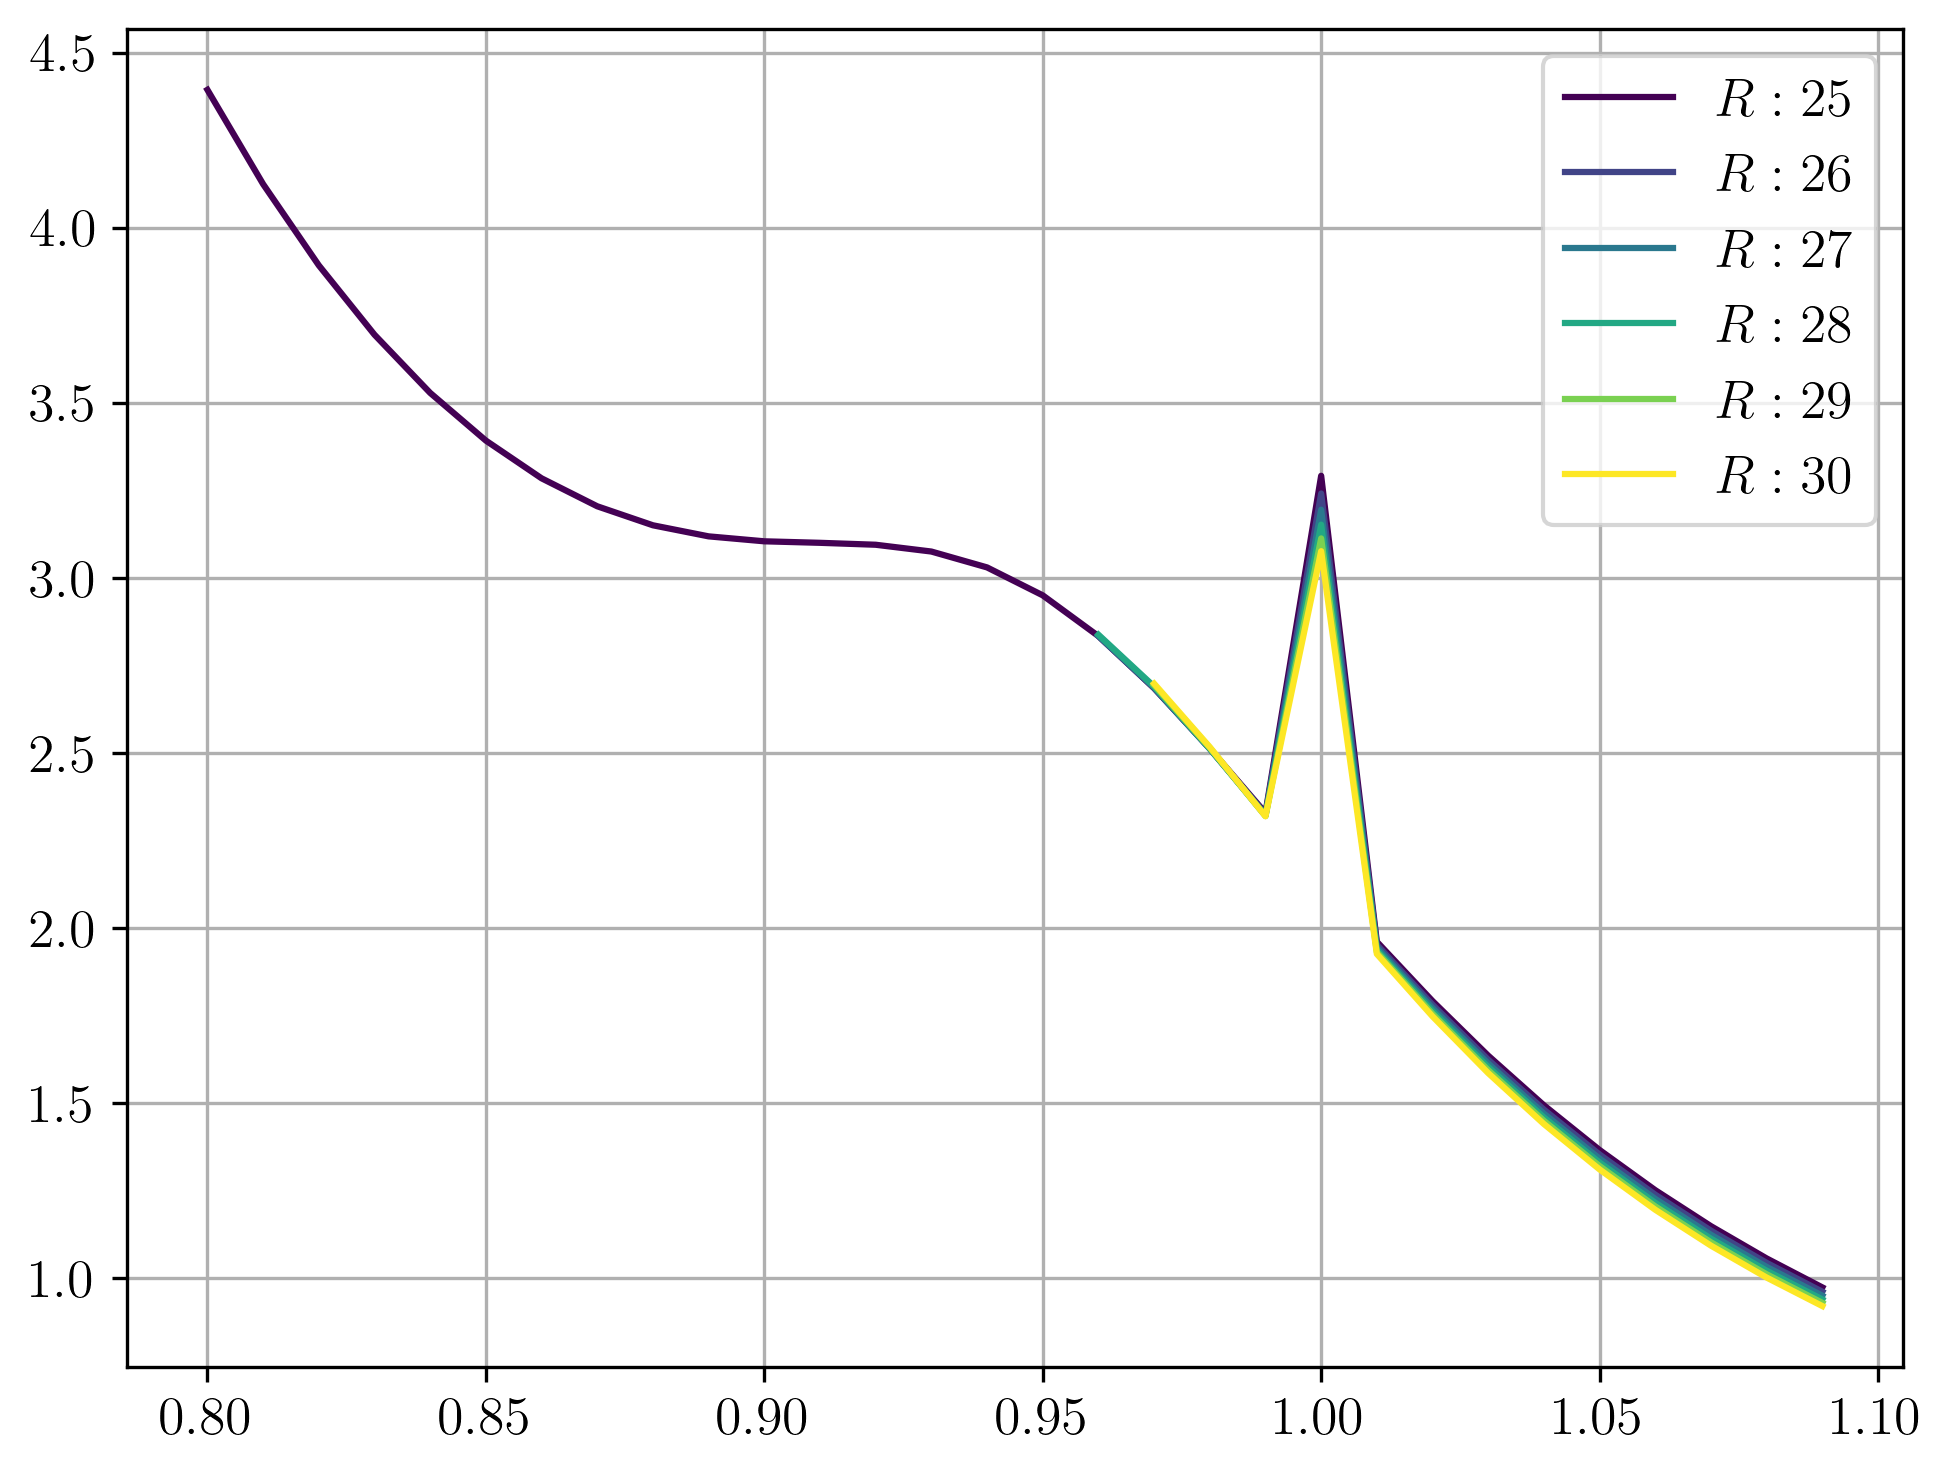

In [6]:
colors = create_sequential_colors(len(Rs))
offset = [0,0,0,0,0,0]
for i, R in enumerate(Rs):
    dfs_cut, cut = cut_fidelity_susceptibility(fid=fidelity[i,:], offset=offset[i], a=a, discr=True)
    # plt.plot(couplings[cut:-1], dfs_cut, color=colors[i], label=f"$R: {R}$")
    plt.plot(couplings[cut:-1], dfs_cut/R, color=colors[i], label=f"$R: {R}$")

plt.grid(True)
plt.legend()

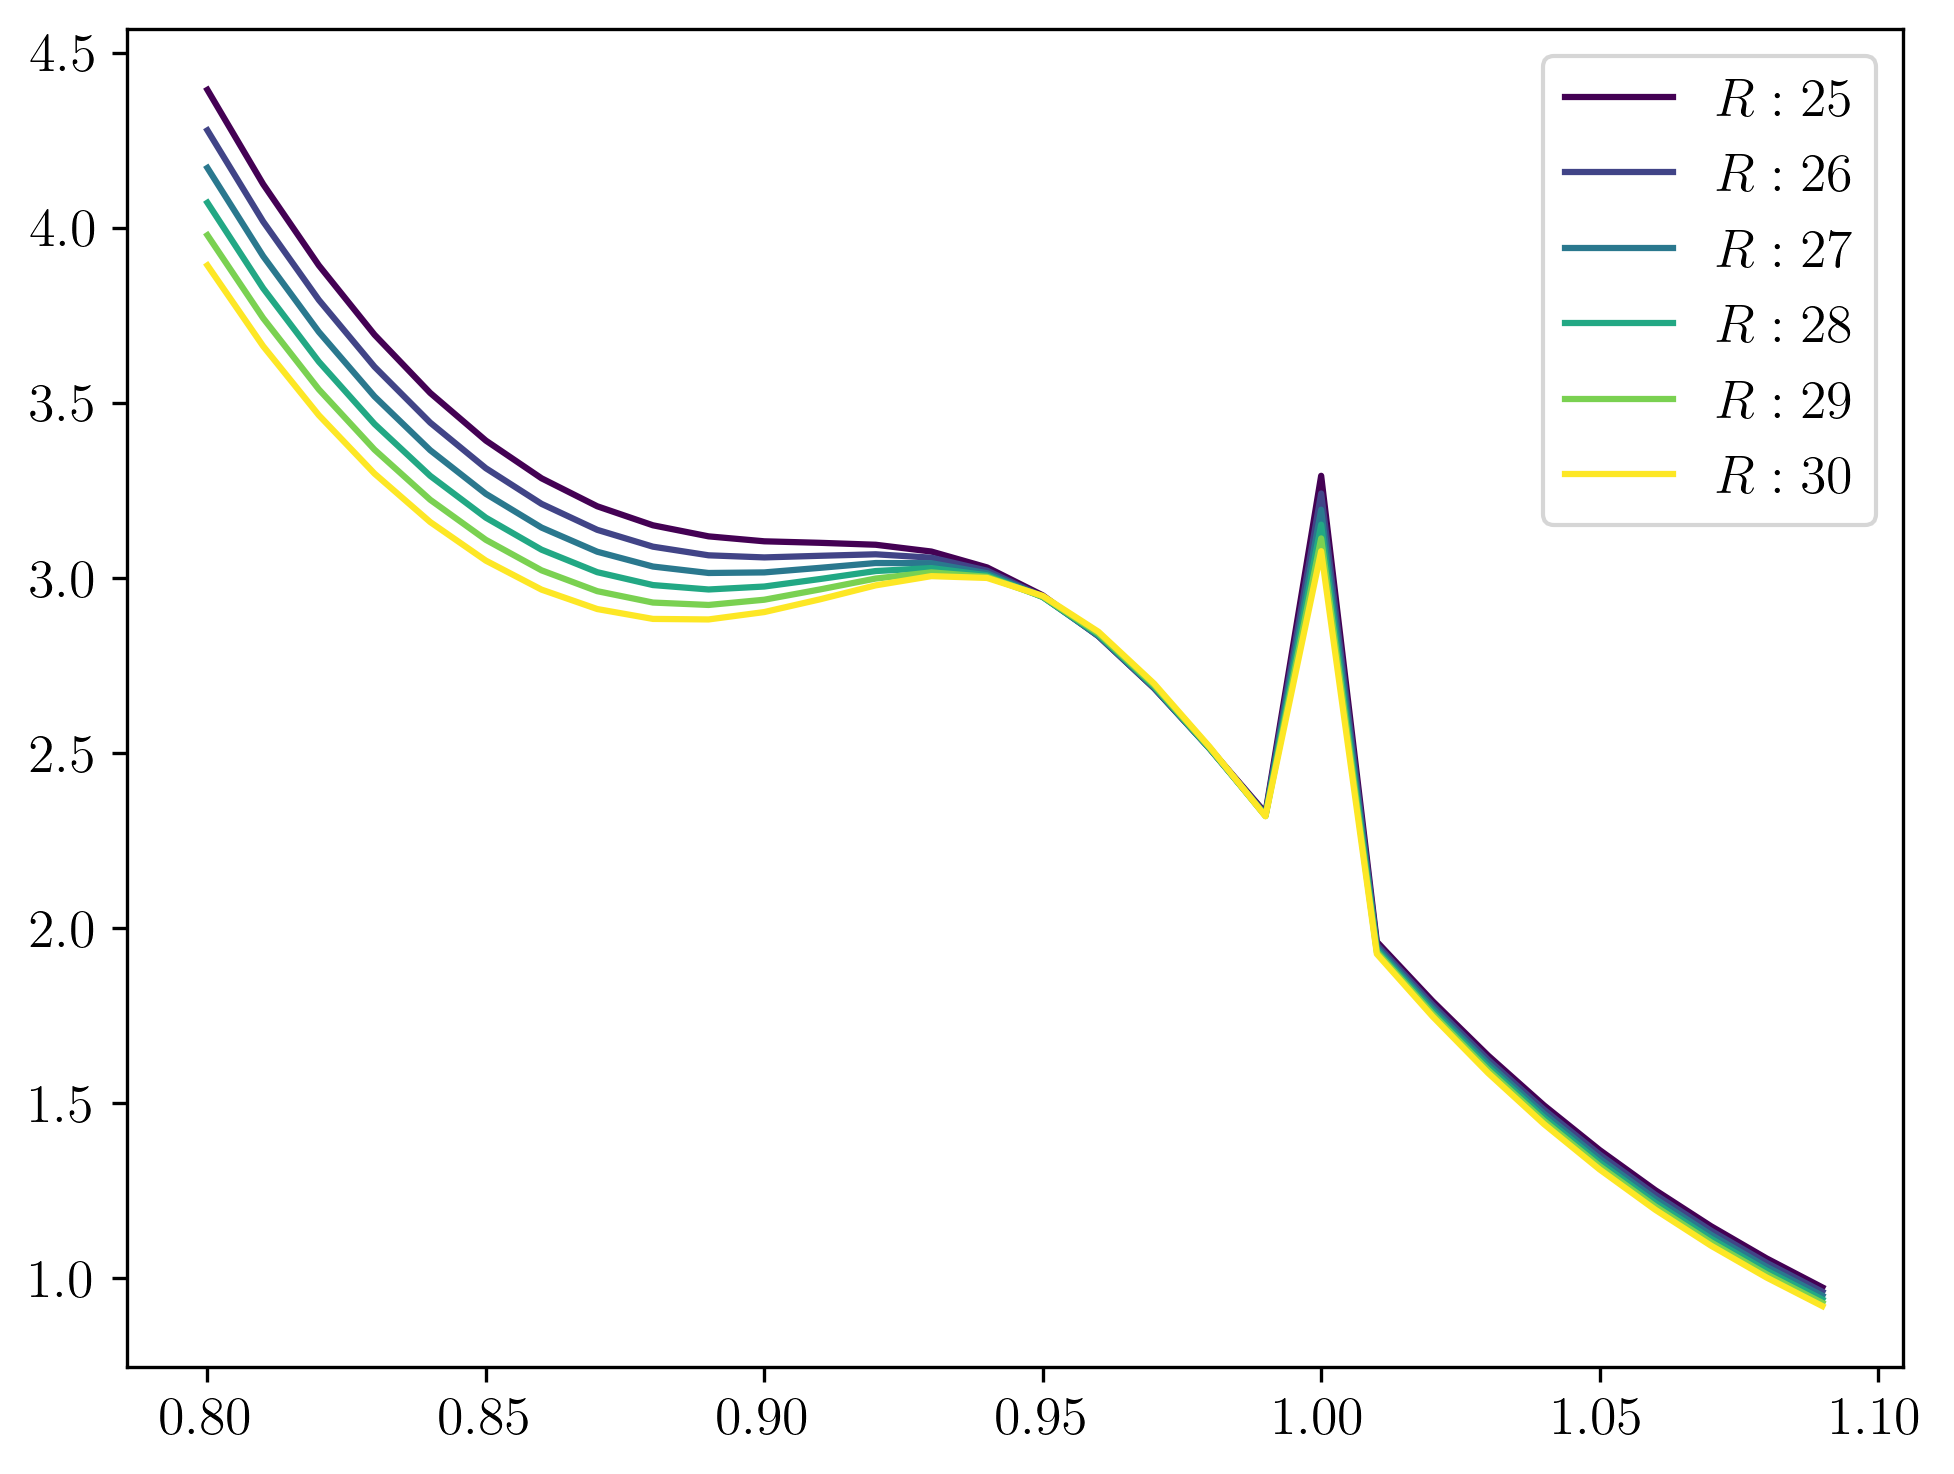

In [7]:
colors = create_sequential_colors(len(Rs))

for i, R in enumerate(Rs):
    dfs = discrete_fidelity_susceptibility(fid=fidelity[i,:], a=a)
    # plt.plot(couplings[:-1], dfs, color=colors[i], label=f"$R: {R}$")
    plt.plot(couplings[:-1], dfs/R, color=colors[i], label=f"$R: {R}$")

plt.legend()

## Off-axis overlaps

In [8]:
fidelity_off_axis = []
for R in Rs:
    fidelity_R = []
    for k in range(len(couplings)-1):
        print(f"R: {R}, coupling: {couplings[k]:.4f}")
        z2_lattice_g = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k], bc='pbc')
        z2_lattice_g.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,1])
        z2_lattice_g.charges = z2_lattice_g.Z2.charges
        z2_lattice_g.Z2._define_sector()
        z2_lattice_g_dg = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k+1], bc='pbc')
        z2_lattice_g_dg.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,1])
        z2_lattice_g_dg.charges = z2_lattice_g_dg.Z2.charges
        z2_lattice_g_dg.Z2._define_sector()
        
        z2_lattice_g.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,1])
        z2_lattice_g_dg.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,1])
        z2_lattice_g.ancilla_sites = z2_lattice_g_dg.sites.copy()

        fidelity_R.append(z2_lattice_g._compute_norm(site=1, mixed=True).copy())
    fidelity_off_axis.append(fidelity_R)
fidelity_off_axis = np.array(fidelity_off_axis)

R: 25, coupling: 0.8000
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.8), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8100
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.82), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8200
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc

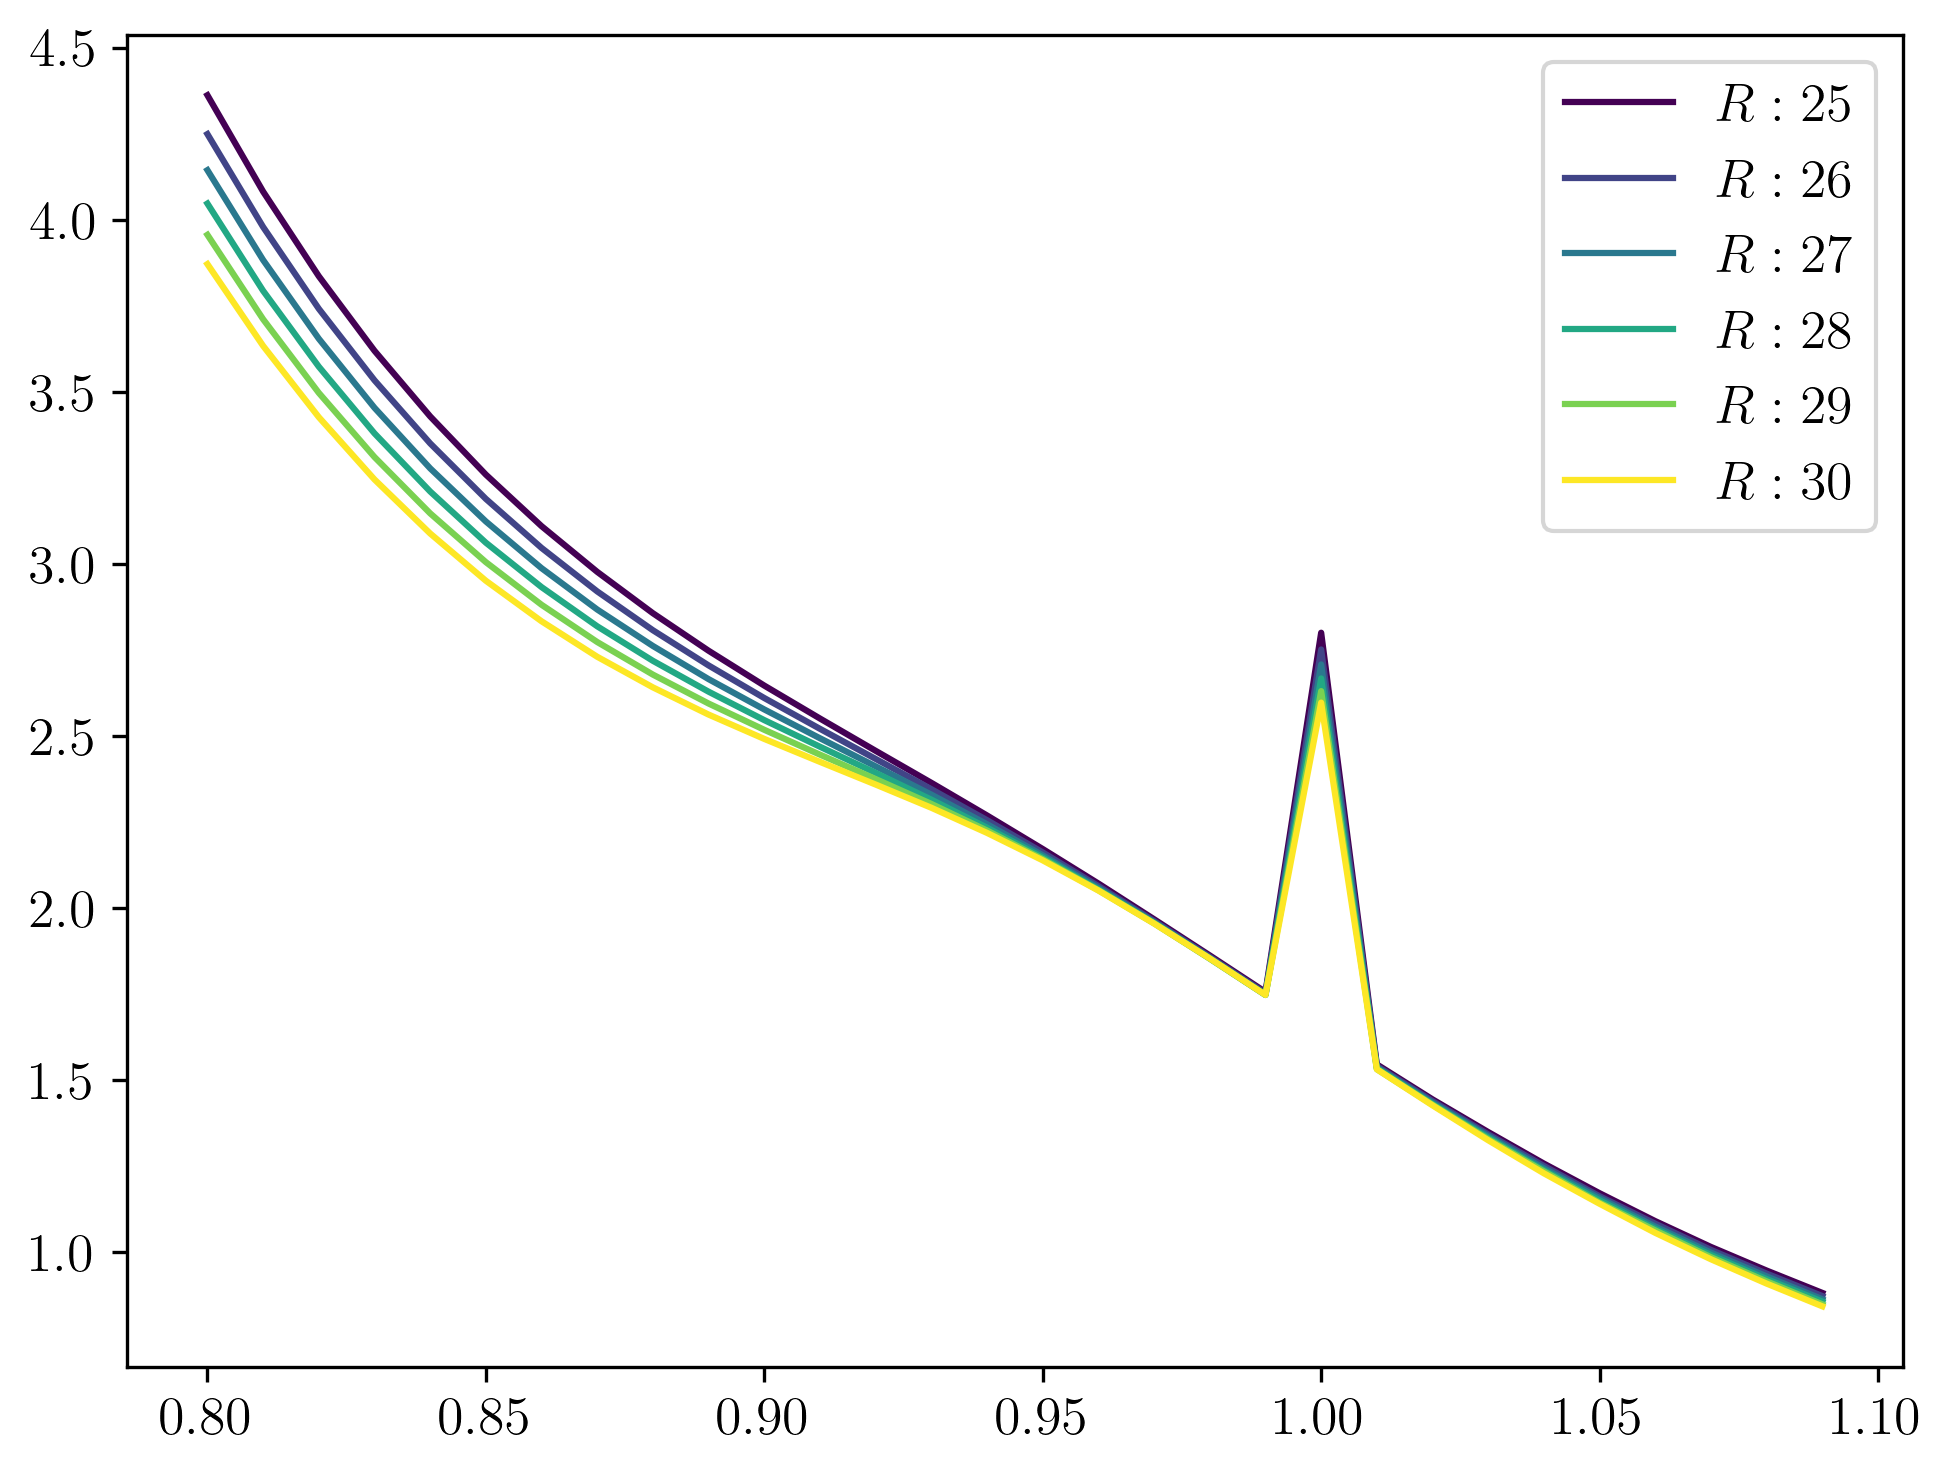

In [9]:
colors = create_sequential_colors(len(Rs))

for i, R in enumerate(Rs):
    dfs = discrete_fidelity_susceptibility(fid=fidelity_off_axis[i,:], a=a)
    # plt.plot(couplings[:-1], dfs, color=colors[i], label=f"$R: {R}$")
    plt.plot(couplings[:-1], dfs/R, color=colors[i], label=f"$R: {R}$")

plt.legend()

## Compare on-axis overlaps with off-axis overlaps

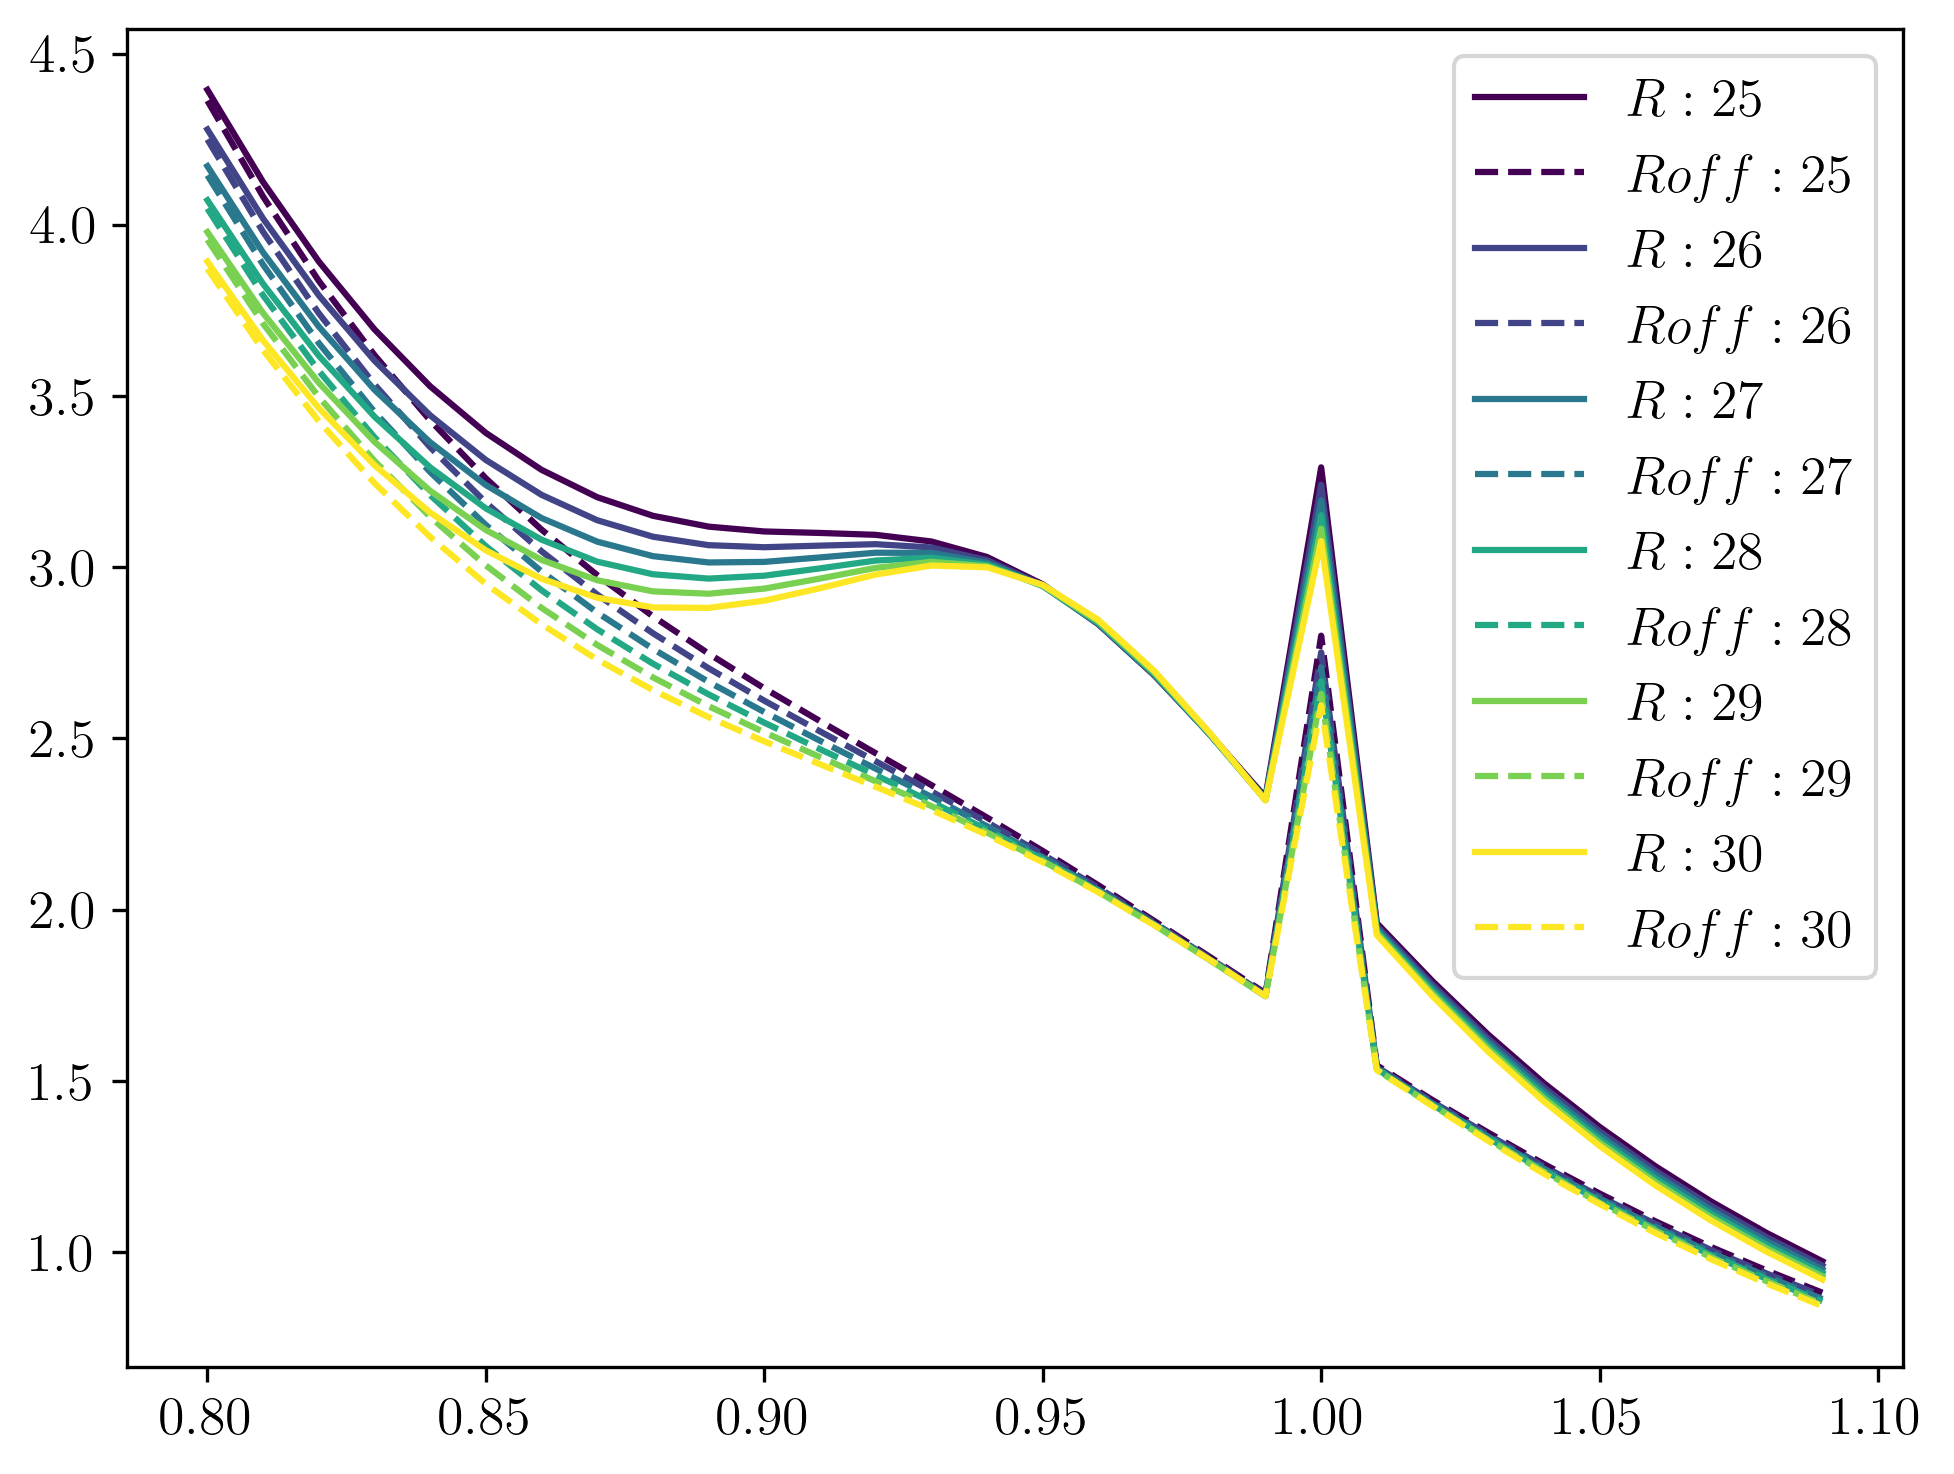

In [10]:
for i, R in enumerate(Rs):
    dfs = discrete_fidelity_susceptibility(fid=fidelity[i,:], a=a)
    dfs_off = discrete_fidelity_susceptibility(fid=fidelity_off_axis[i,:], a=a)
    # plt.plot(couplings[:-1], dfs, color=colors[i], label=f"$R: {R}$")
    plt.plot(couplings[:-1], dfs/R, color=colors[i], label=f"$R: {R}$")
    plt.plot(couplings[:-1], dfs_off/R, color=colors[i], linestyle='--', label=f"$R off: {R}$")

plt.legend()

In [11]:
from qs_mps.applications.Z2.relevant_observables import fit_params_sys

def pot_diff_plots(l, L, chis, bc, sector, h_i, h_f, npoints, path, param, fit):
    euclidean = True
    manhatten = False
    
    cx = None
    cy = None
    Rs = [25,26,27,28,29,30]
    sigmas_on, sigmas_on_err, sigmas_on_ris, sigmas_on_ris_err, list_ris = fit_params_sys(Rs, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)

    cx = None
    cy = None
    Rs = [25,26,27,28,29,30]
    sigmas_off, sigmas_off_err, sigmas_off_ris, sigmas_off_ris_err, list_ris = fit_params_sys(Rs, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

    obs = np.array(sigmas_off) - np.array(sigmas_on)
    obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

    return obs, obs_err

def rri_plot(ax):
    ax.grid(color="gray", linestyle=":")
    ax.patch.set_facecolor('none')
    
    colors = ["#ff0f7b", "#f89b29"]
    colors = ["#4A8FE7", "#D95D39"]
    colors = ["firebrick", "teal"]

    l = 5
    L = 50
    fit = 1

    left_axis_limits = (-0.5e-3,1e-3)
    right_axis_limits = (0.5,5)

    chis = [64,128]
    bc = 'pbc'
    sector = "2_particle(s)_sector"

    param = 0

    if param == 0:
        label='$\\sigma_{\\mathrm{off}} - \\sigma_{\\mathrm{on}}$'
    elif param == 1:
        label="$\\gamma_{\\mathrm{off}} - \\gamma_{\\mathrm{on}}$"
    elif param == -1:
        label="$\\beta_{\\mathrm{off}} - \\beta_{\\mathrm{on}}$"
    
    rescale = 1
    h_i, h_f, npoints = 0.8, 1.1, 31
    gs = np.linspace(h_i,h_f,npoints)
    obs, obs_err = pot_diff_plots(l, L, chis, bc, sector, h_i, h_f, npoints, path, param, fit=fit)
    top_plot, = ax.plot(gs[0::2], rescale*obs[0::2], markersize=5, color=colors[0], marker='d', fillstyle=None, mew=0.5, mfc='w', label=label, zorder=5)
    ax.fill_between(x=gs[0::2], y1=rescale*(obs[0::2]-obs_err[0::2]), y2=rescale*(obs[0::2]+obs_err[0::2]), color=colors[0], alpha=0.4, zorder=4)


    # h_i, h_f, npoints = 1.0, 2.0, 6
    # gs = np.linspace(h_i,h_f,npoints)
    # label = None
    # obs, obs_err = pot_diff_plots(l, L, chis, bc, sector, h_i, h_f, npoints, path, param, fit=fit)
    # ax.plot(gs[0:], rescale*obs[0:], markersize=5, color=colors[0], marker='d', fillstyle=None, mew=0.5, mfc='w', label=label, zorder=3)
    # ax.fill_between(x=gs[0:], y1=rescale*(obs[0:]-obs_err[0:]), y2=rescale*(obs[0:]+obs_err[0:]), color=colors[0], alpha=0.4, zorder=2)
    
    # Create a second y-axis sharing the same x-axis
    ax2 = ax.twinx()

    ax2.set_zorder(ax.get_zorder() - 1)
    # ax2.patch.set_visible(False)

    param = -1

    if param == 0:
        label=r'$\sigma{\mathrm{off}} - \sigma{\mathrm{on}}$'
    elif param == 1:
        label=r"$\\gamma_{\\mathrm{off}} - \\gamma_{\\mathrm{on}}$"
    elif param == -1:
        label='$\\beta_{\\mathrm{off}} - \\beta_{\\mathrm{on}}$'
    
    h_i, h_f, npoints = 0.8, 1.1, 31
    colors = create_sequential_colors(len(Rs))
    for i, R in enumerate(Rs):
        dfs = discrete_fidelity_susceptibility(fid=fidelity[i,:], a=a)
        dfs_off = discrete_fidelity_susceptibility(fid=fidelity_off_axis[i,:], a=a)
        # plt.plot(couplings[:-1], dfs, color=colors[i], label=f"$R: {R}$")
        ax2.plot(couplings[:-1], dfs/R, color=colors[i])
        ax2.plot(couplings[:-1], dfs_off/R, color=colors[i], linestyle='--')

    # h_i, h_f, npoints = 1.0, 2.0, 6
    # gs = np.linspace(h_i,h_f,npoints)
    # label = None
    # obs, obs_err = pot_diff_plots(l, L, chis, bc, sector, h_i, h_f, npoints, path, param, fit=fit)
    # ax2.plot(gs[0:], obs[0:], markersize=7, color=colors[1], marker='P', fillstyle=None, mew=0.5, mfc='w', label=label, zorder=1)
    # ax2.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color=colors[1], alpha=0.4, zorder=0)


    # Force exponential notation on the x-axis
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-1, 1))  # Force scientific notation outside this range
    formatter.set_useOffset(False)

    gr = 0.91
    ax2.axvspan(0.79, gr, color="#009B72", alpha=0.10, zorder=0)
    ax2.vlines(gr, right_axis_limits[0], right_axis_limits[1]+right_axis_limits[1]*0.05, 'k', '--', linewidth=0.8, zorder=1)
    ax2.axvspan(gr, 1.11, color="#009DDC", alpha=0.10, zorder=0)
    ax2.text(gr+0.01, right_axis_limits[0]+0.18, '$g_{\\mathrm{r}}$')
    
    
    ax.yaxis.set_major_formatter(formatter)
    ax.ticklabel_format(style='sci', axis='y')
    ax.set_ylabel("$\\sigma_{\\mathrm{off}} - \\sigma_{\\mathrm{on}}$", color=colors[0])
    ax.tick_params(axis='y', labelcolor=colors[0])

    ax2.yaxis.set_major_formatter(formatter)
    ax2.ticklabel_format(style='sci', axis='y')
    ax2.set_ylabel("$\\chi_{\\mathcal{F}} = \\frac{2}{(\delta g)^2}\\left( 1 - \\langle \\psi(g)| \\psi(g+ \delta g)\\rangle \\right)$", color=colors[1])
    ax2.tick_params(axis='y', labelcolor=colors[1])

    ax2.set_ylim((right_axis_limits[0], right_axis_limits[1]+right_axis_limits[1]*0.05))
    ax.set_ylim((left_axis_limits[0], left_axis_limits[1]+left_axis_limits[1]*0.05))
    ax.set_xlim(left=0.79, right=1.11)
    ax2.set_xlim(left=0.79, right=1.11)
    ax.set_yticks(ticks=np.linspace(left_axis_limits[0],left_axis_limits[1],4), labels=["$-0.0005$","$0$","$0.0005$","$0.0010$"])
    ax.set_xticks(ticks=[0.8,0.9,1.0,1.1], labels=[0.8,0.9,1.0,1.1])
    ax2.set_yticks(ticks=np.linspace(0.5,4.5,5), labels=["$0.5$","$1.5$","$2.5$","$3.5$","$4.5$"])

    # ax.set_xticks(ticks=[0.4,0.6,0.8,1.0], labels=[0.4,0.6,0.8,1.0])
    # ax.set_yticks(ticks=[0,0.5,1,1.5], labels=[0.,0.5,1,1.5])
    
    # --- proxy legend handles ---
    solid_line = Line2D(
        [], [], color='black', linestyle='-', linewidth=2,
        label='on-axis'
    )

    dashed_line = Line2D(
        [], [], color='black', linestyle='--', linewidth=2,
        label='off -axis'
    )



    handles1, labels1 = ax.get_legend_handles_labels()
    # handles2, labels2 = ax2.get_legend_handles_labels()
    
    # leg1 = ax.legend(handles1, labels1, loc='upper left')
    # ax.add_artist(leg1)
    ax2.text(0.95, 4.5, f"$R={Rs}$")
    ax.legend(handles=[top_plot, solid_line, dashed_line], loc='upper left')
    # Merge and show the legend only in ax1
    ax.set_xlabel(r"$g$")
    ax.set_title("(c)", loc='left', fontsize=14)


<>:117: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:117: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
/var/folders/q8/7d5rxq0s6yv54h2hp2nhd2sr0000gq/T/ipykernel_69613/692329070.py:117: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  ax2.set_ylabel("$\\chi_{\\mathcal{F}} = \\frac{2}{(\delta g)^2}\\left( 1 - \\langle \\psi(g)| \\psi(g+ \delta g)\\rangle \\right)$", color=colors[1])


[25, 26, 27, 28, 29, 30]
[26, 27, 28, 29, 30]
Weighted Average: 0.995539141218549
Error in the Average: 9.423857672903394e-05
Weighted Average: 1.0365174134859518
Error in the Average: 8.035838289857299e-05
Weighted Average: 1.0769684630912197
Error in the Average: 5.12566720701375e-05
Weighted Average: 1.1168953888606175
Error in the Average: 5.554140041290227e-05
Weighted Average: 1.156299944914975
Error in the Average: 4.151424351945742e-05
Weighted Average: 1.1951834131862131
Error in the Average: 2.534660632008107e-05
Weighted Average: 1.2335476373402379
Error in the Average: 4.649703016504548e-05
Weighted Average: 1.271393833744569
Error in the Average: 1.982308117497207e-05
Weighted Average: 1.3087211349761023
Error in the Average: 2.144570659296613e-05
Weighted Average: 1.3455298735093928
Error in the Average: 3.033343430958224e-05
Weighted Average: 1.3818191690060113
Error in the Average: 5.562119939204236e-05
Weighted Average: 1.4175817468857268
Error in the Average: 9.890599

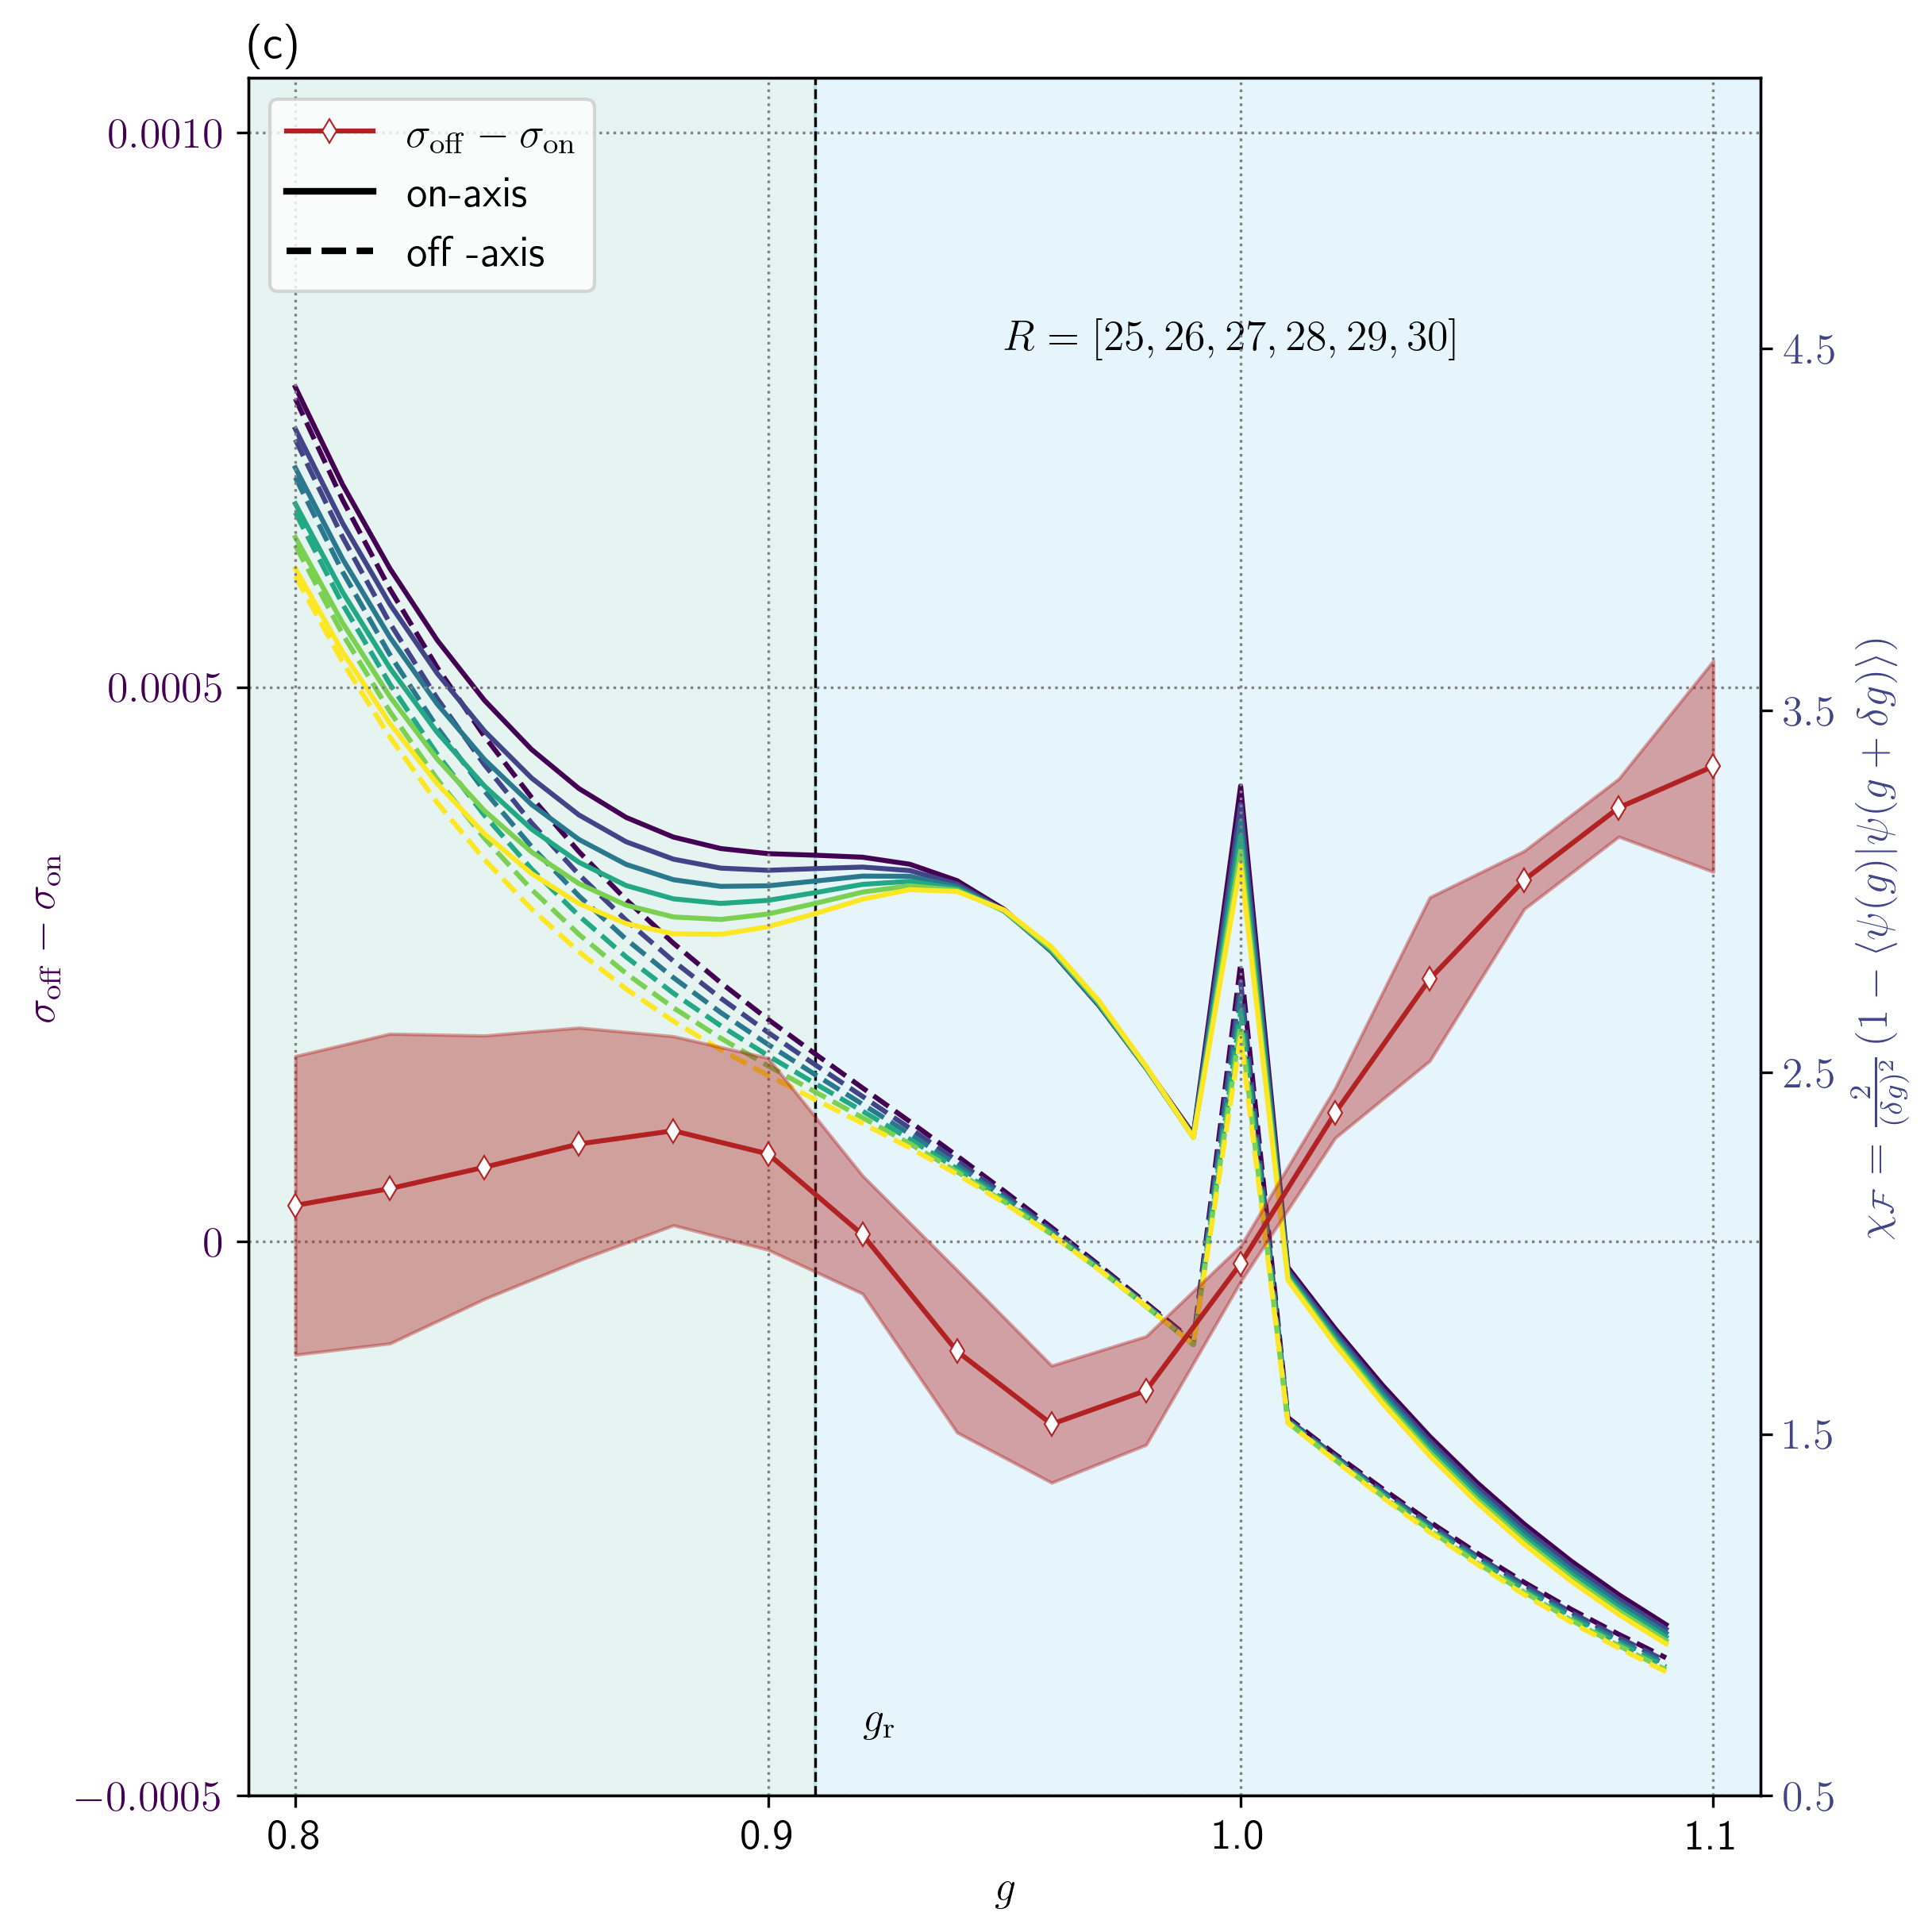

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

rri_plot(ax)

Taking the difference of on-axis and off-axis fidelity susceptibilities would correspond in  
how differently the two string configurations respond to the same microscopic deformation in the parameter space (coupling change $\delta g$).  
The on-axis undergoes the roughening transition, while the off-axis string is already rough.
Then, we expect a large difference happening at the roughening point.

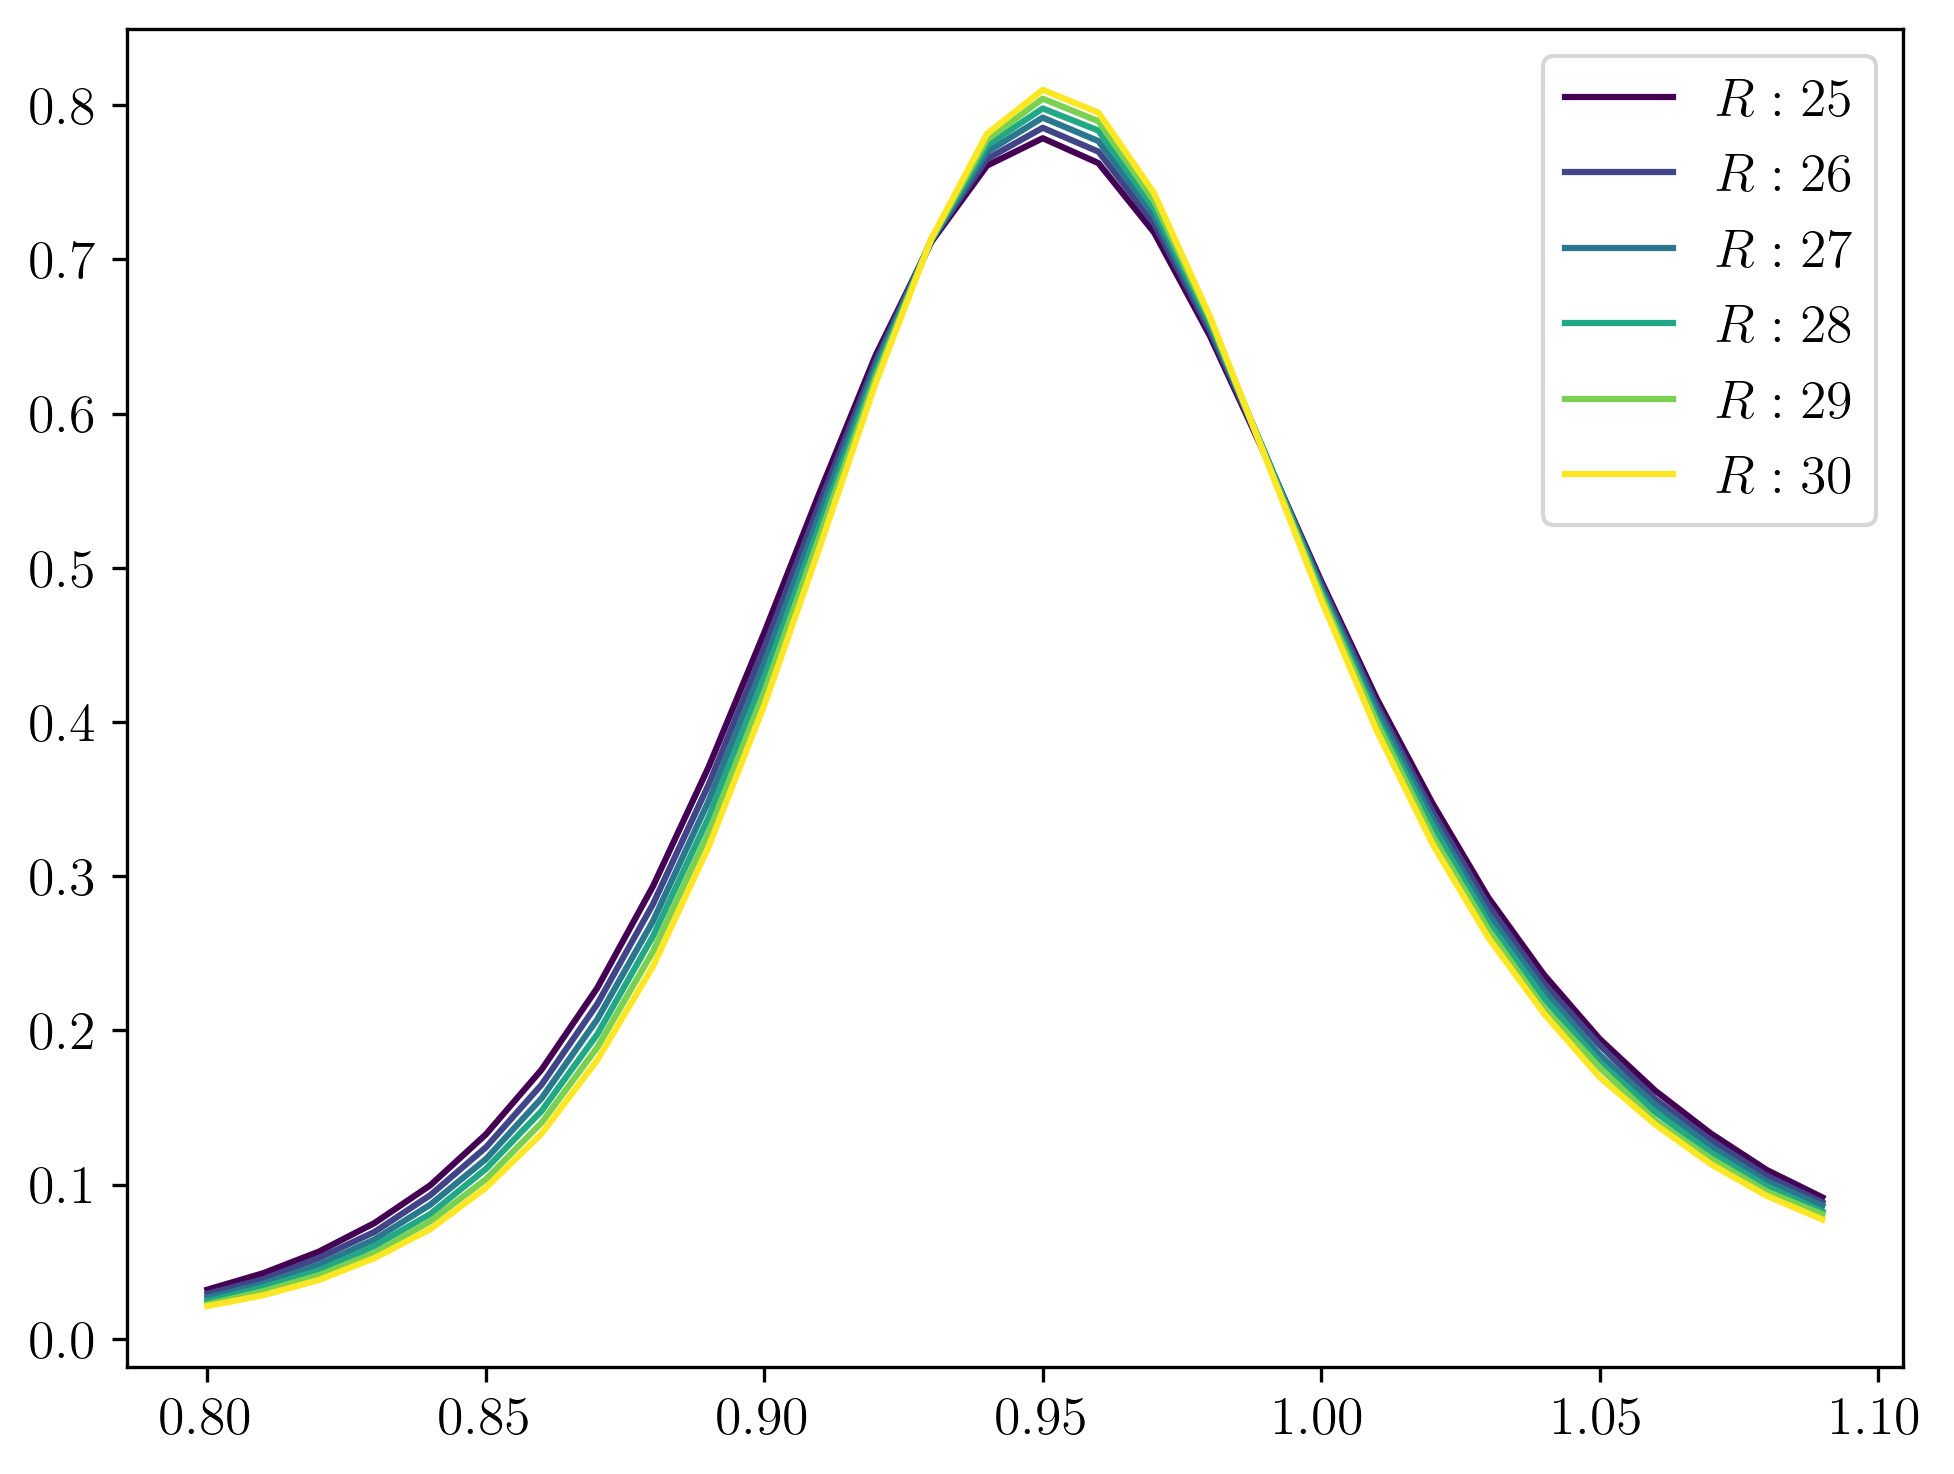

In [13]:
for i, R in enumerate(Rs):
    dfs = discrete_fidelity_susceptibility(fid=fidelity[i,:], a=a)
    dfs_off = discrete_fidelity_susceptibility(fid=fidelity_off_axis[i,:], a=a)
    # plt.plot(couplings[:-1], dfs, color=colors[i], label=f"$R: {R}$")
    plt.plot(couplings[:-1], dfs/R - dfs_off/R, color=colors[i], label=f"$R: {R}$")

plt.legend()

## Overlap between different sectors $\langle \psi_{on}(g) | \psi_{off}(g) \rangle$

In [18]:
fidelity_on_vs_off = []
for R in Rs:
    fidelity_R = []
    for k in range(len(couplings)):
        print(f"R: {R}, coupling: {couplings[k]:.4f}")
        z2_lattice_on = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k], bc='pbc')
        z2_lattice_on.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,0])
        z2_lattice_on.charges = z2_lattice_on.Z2.charges
        z2_lattice_on.Z2._define_sector()
        z2_lattice_off = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k], bc='pbc')
        z2_lattice_off.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,1])
        z2_lattice_off.charges = z2_lattice_off.Z2.charges
        z2_lattice_off.Z2._define_sector()
        
        z2_lattice_on.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,0])
        z2_lattice_off.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,1])
        z2_lattice_on.ancilla_sites = z2_lattice_off.sites.copy()

        fidelity_R.append(z2_lattice_on._compute_norm(site=1, mixed=True).copy())
    fidelity_on_vs_off.append(fidelity_R)
fidelity_on_vs_off = np.array(fidelity_on_vs_off)

R: 25, coupling: 0.8000
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.8), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.8), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8100
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8200
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc'

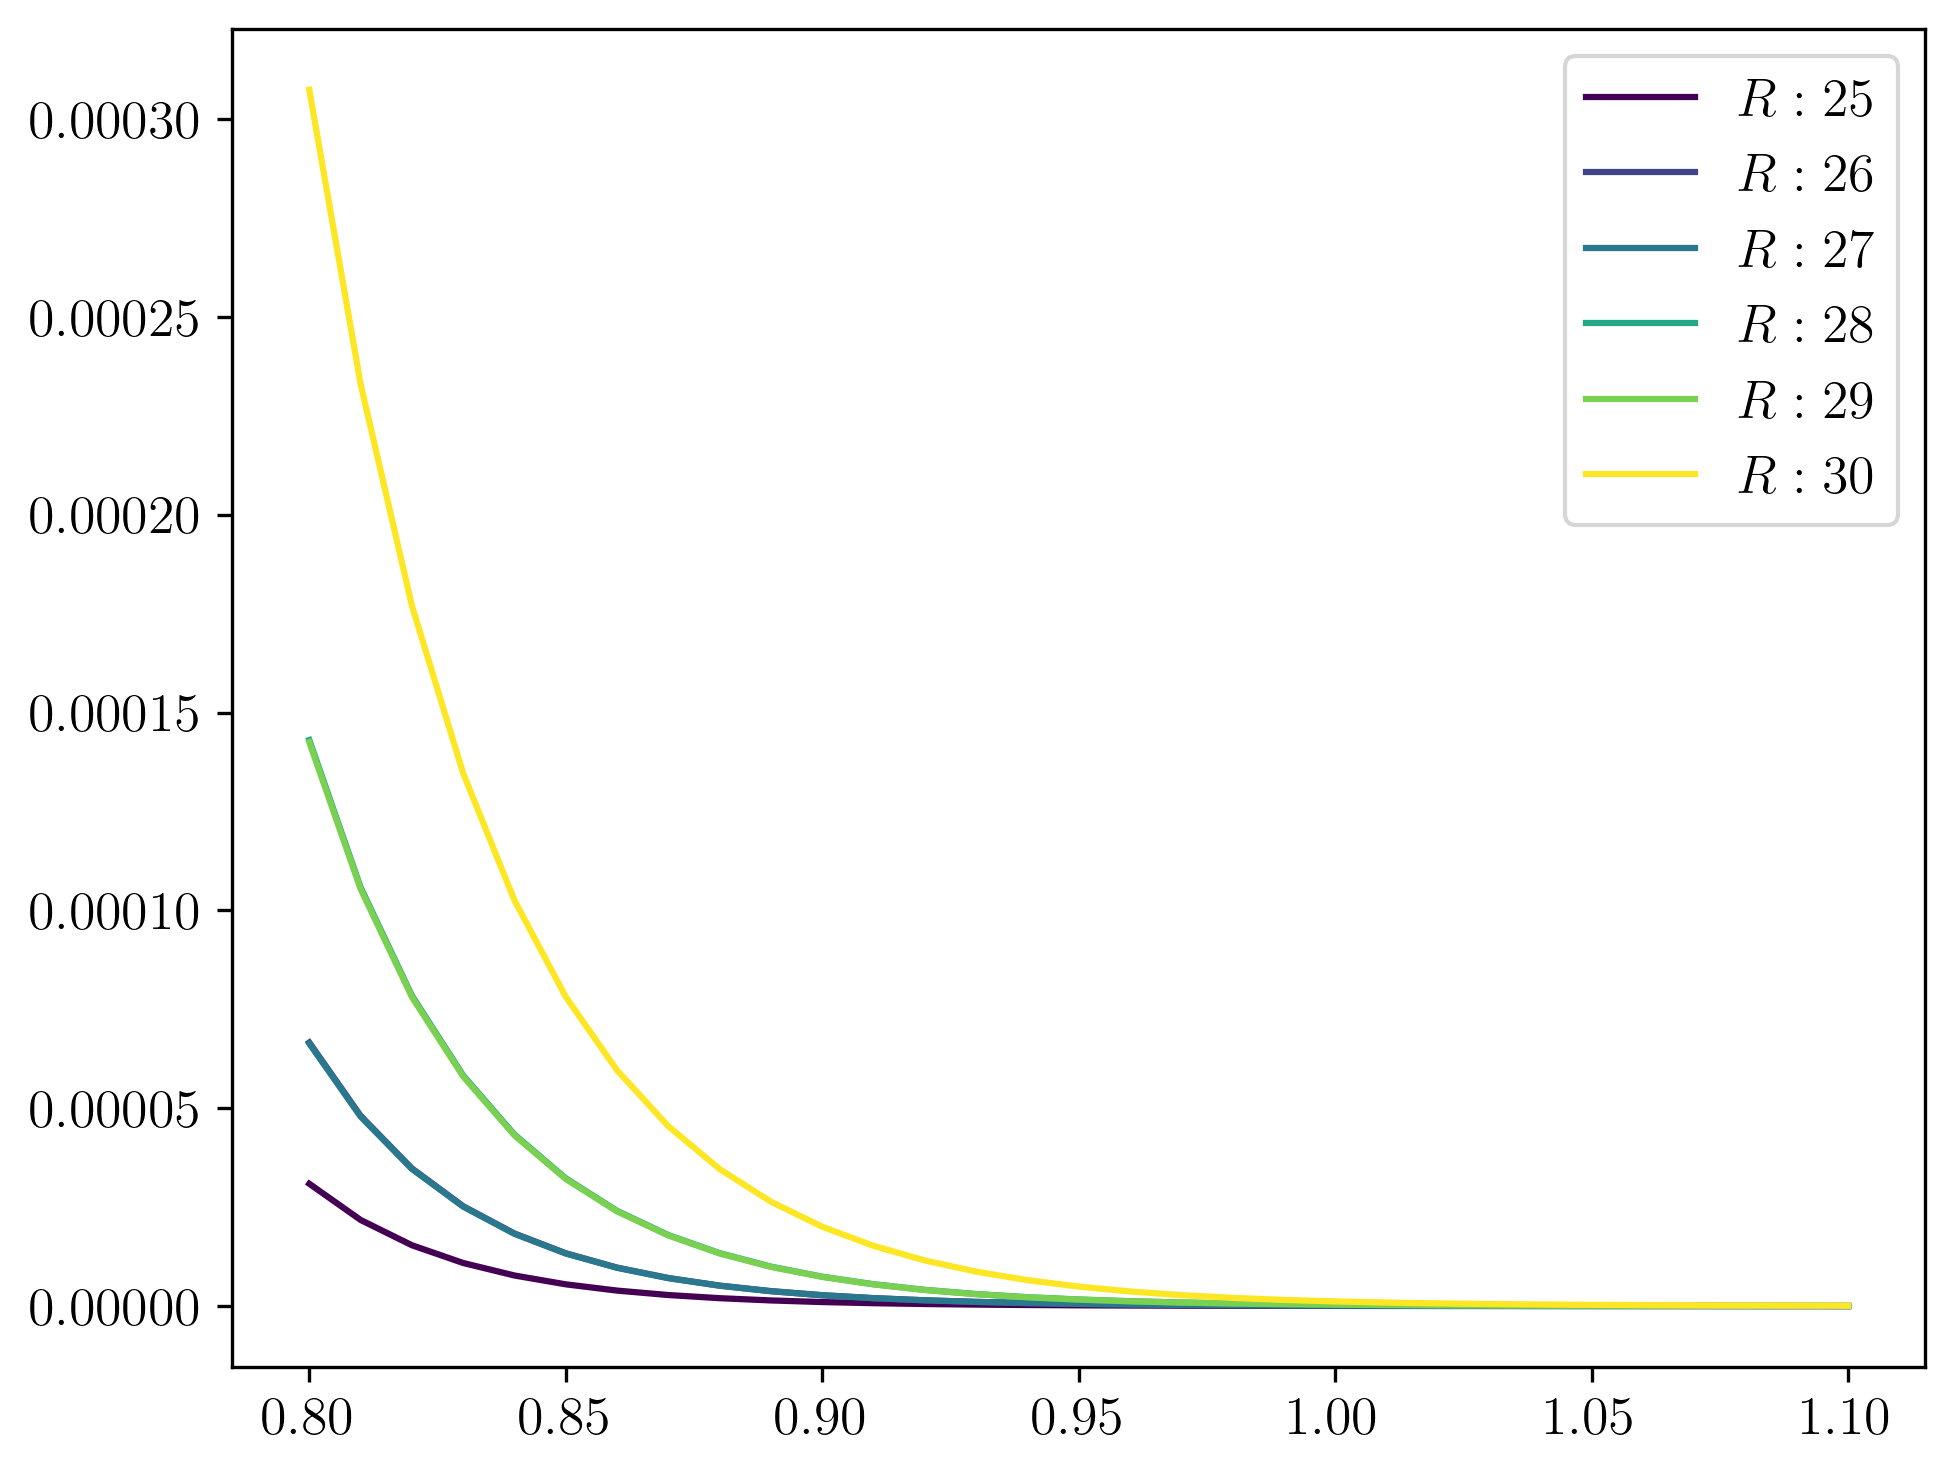

In [23]:
for i, R in enumerate(Rs):
    plt.plot(couplings, np.abs(fidelity_on_vs_off[i,:]), color=colors[i], label=f"$R: {R}$")
plt.legend()

This quantity should be zero, independently of the coupling. If the two string configurations, for the limit $R \to \infty$, are equivalent but for the angle, in the roughening phase isotropy would give two degenerate states. The two states, constitute part of the basis relative to the energy eigenvalue for a certain coupling within the rough phase. Hence, the states are orthogonal.

## Data collapse

In [14]:
colors = create_sequential_colors(len(Rs))
offset = [10,0,0,0,0,0,0,0,0,0]
y_max = []
x_max = []
for i, R in enumerate(Rs):
    dfs_cut, cut = cut_fidelity_susceptibility(fid=fidelity[i,:], offset=offset[i], a=a, discr=True)
    y_max.append(np.max(dfs_cut))
    x_max.append(couplings[cut+np.argmax(dfs_cut)])

In [15]:
x_max, y_max

([np.float64(1.0000000000000002),
  np.float64(1.0000000000000002),
  np.float64(1.0000000000000002),
  np.float64(1.0000000000000002),
  np.float64(1.0000000000000002),
  np.float64(1.0000000000000002)],
 [np.float64(82.28352871443967),
  np.float64(84.26065694185914),
  np.float64(86.24987476939738),
  np.float64(88.24952442492373),
  np.float64(90.26013878471461),
  np.float64(92.2783187786802)])

In [16]:
def linear_law(x, a, b):
    return a * x + b

def power_law(x, a, b, c):
    return a * (x ** b) + c

## using maxima peaks to extract the value of nu

popt, cov = curve_fit(linear_law, np.log(Rs)[0:], np.log(y_max)[0:])

a_fit = popt[0]
a_err = np.sqrt(np.diag(cov))[0]

# Calculate nu and its error
nu_fit = 2 / a_fit
nu_err = (2 / a_fit**2) * a_err


## using the pseudocritical points to extract the value of g_c

popt, cov = curve_fit(power_law, [1/R for R in Rs][0:], x_max[0:])

g_c_fit = popt[2]
g_c_err = np.sqrt(np.diag(cov))[2]

print(f"nu: {nu_fit}+/-{nu_err}")
print(f"g_c: {g_c_fit}+/-{g_c_err}")

nu: 3.180341280443664+/-0.0217739521977798
g_c: 1.0000000004472198+/-9.486956681247489e-11


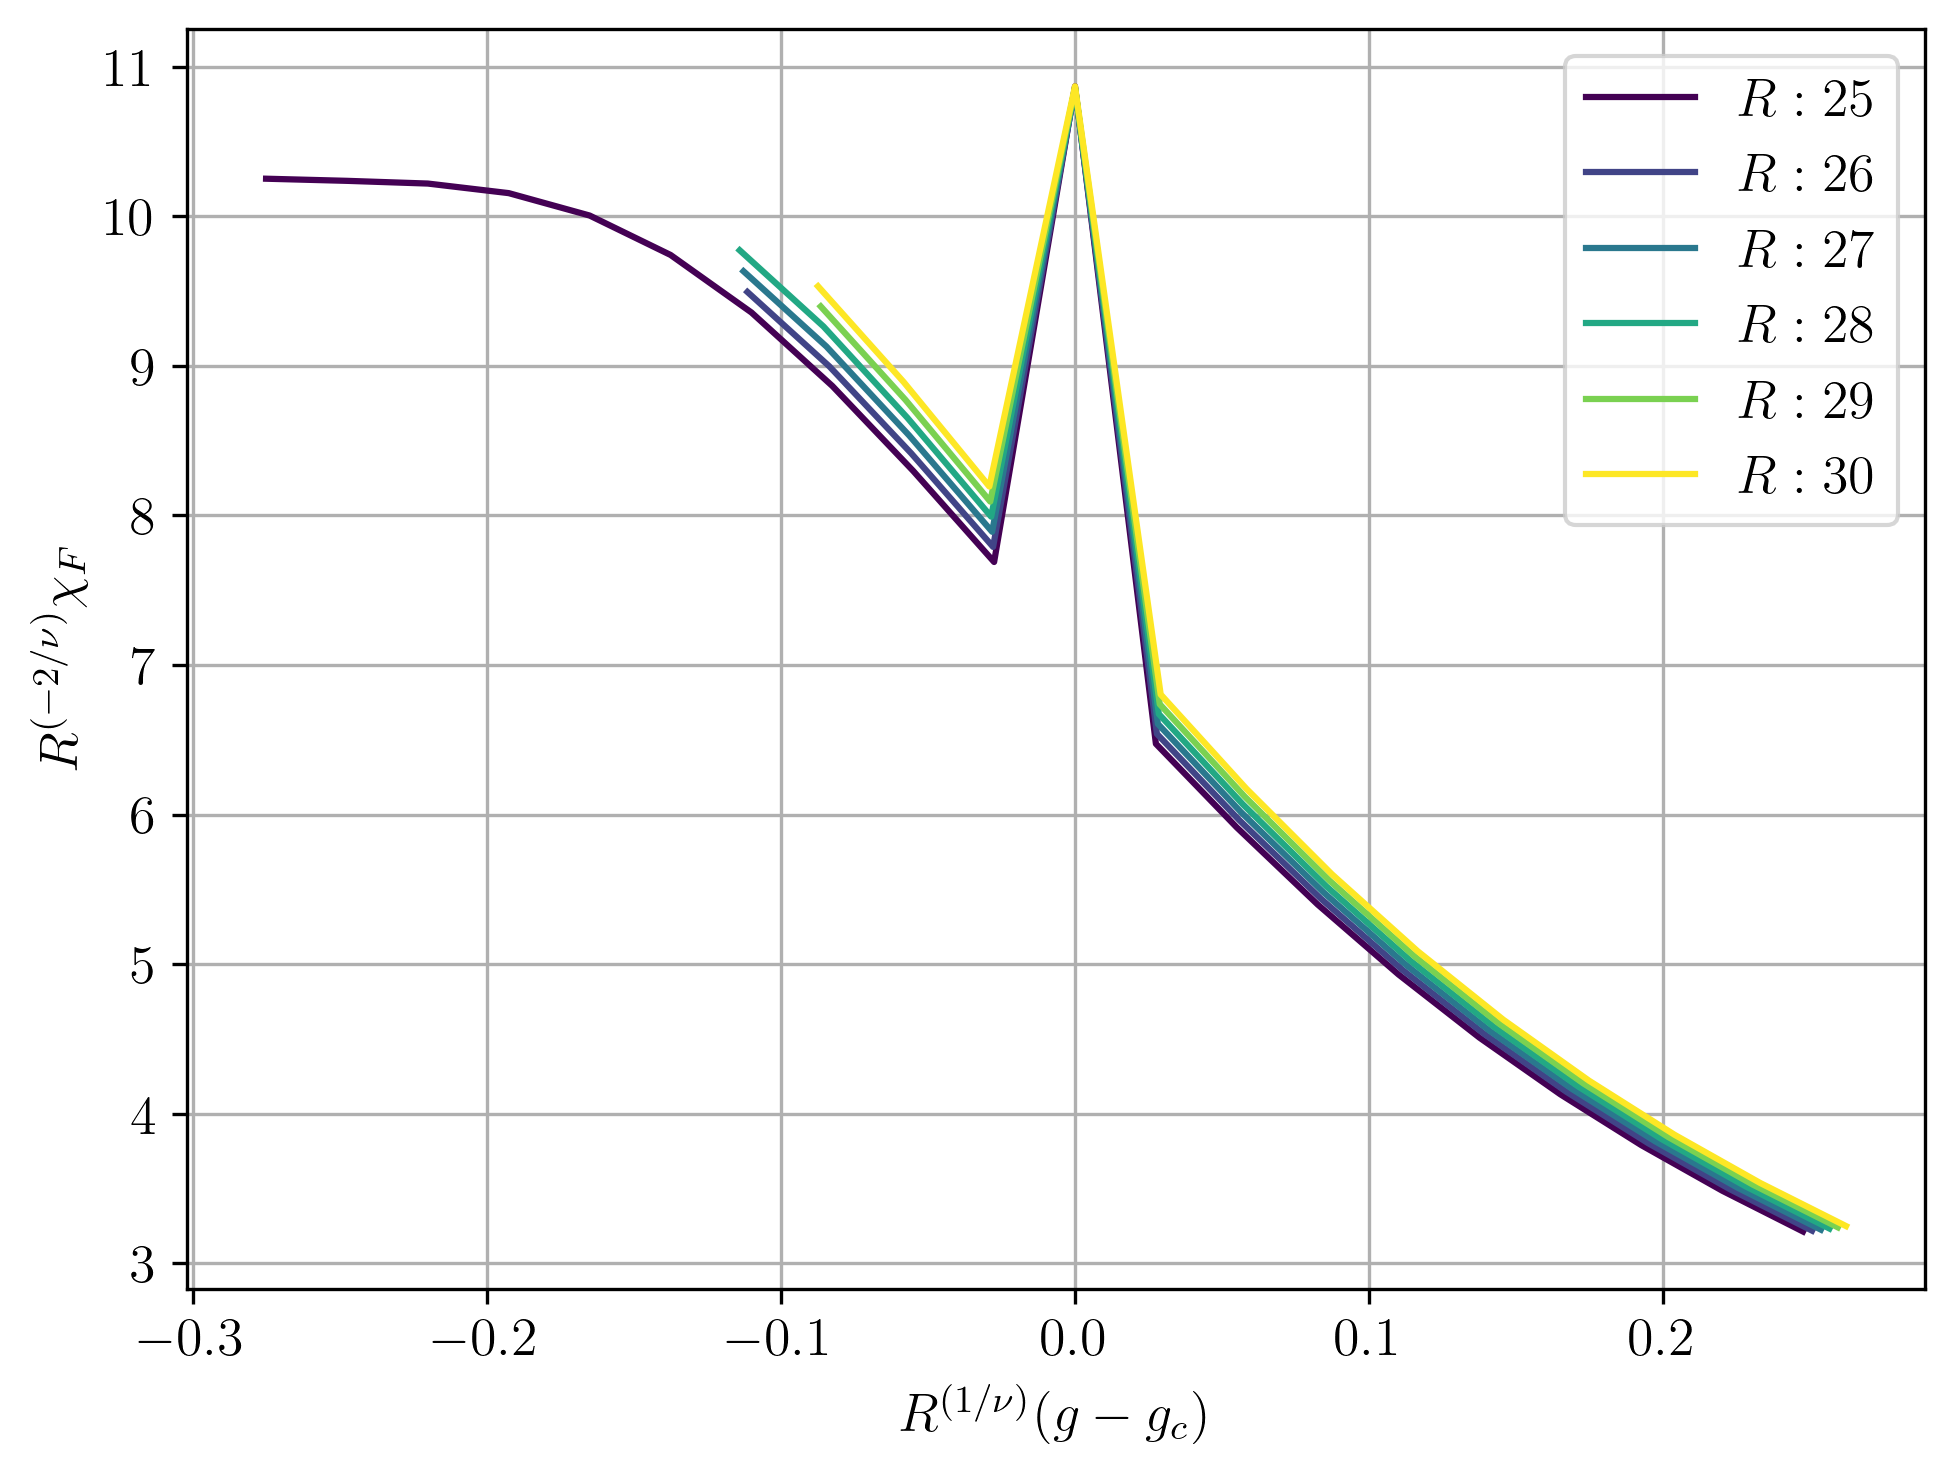

In [17]:

colors = create_sequential_colors(len(Rs))
for i, R in enumerate(Rs):
    dfs_cut, cut = cut_fidelity_susceptibility(fid=fidelity[i,:], offset=offset[i], a=a, discr=True)
    plt.plot((couplings[cut:-1]-g_c_fit)*(R**(1/nu_fit)), dfs_cut/(R**(2/nu_fit)), color=colors[i], linestyle='-', label=f"$R: {R}$")


plt.xlabel("$R^{(1/\\nu)} (g-g_c)$")
plt.ylabel("$R^{(-2/\\nu)} \\chi_F$")
plt.grid(True)
plt.legend()